# Mod 5 Project Office Hours / SVC Kernel Lab

- online-ds-ft-100719
- 01/28/20

## Announcements / Discussion

- **Please propose your data set by the end of today.**
    - Anyone stuck or hit a road block with a desired data set?
- **Mod 6 starts next week** with Section 42: Graph Theory
    - Mod 6 is unlocked (but I don't expect you to be working on it yet due to project)
    
- **Study Groups for Sections 40-41 (PySpark)**
    - I would like to save this until towards the end of Mod 6 
    - Right before Section 50: Operationalizing Code And AWS
    - Thematically more related than current material

# Today's Objectives

1. Mod 5 project related questions?
2. Sect 36 - Kernels Lab - Solution into Functions
3. SVM/Iowa Prisoners Revisited with Kernel Grid Searching 

## Questions

- What to do with a crazy number of features and how to choose/encode which ones?

- Overall Workflow (OSEMN)

- 

- Terry
    - 90 (out of 700)
    
- Devin
    - 10 -> 21,034
    

### Dealing with Categoricals
1. LabelEncode whenever its appropraite( whenver theres an order to your categories)
    - you could use the mid-range value if you have bins

2. Rearrange to create monotonic relationship that can be LabelEncoded

In [1]:
!pip install -U fsds_100719
i

fsds_1007219  v0.7.4 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


['[i] Pandas .iplot() method activated.']


In [22]:
df = fs.datasets.load_mod1_proj()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
import plotly.express as px
# from plotly import express as px
import cufflinks as cf
cf.go_offline()

In [26]:
fig =df.iplot(kind='bar',x='bedrooms',y='price', theme='solar')
fig

In [3]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [4]:
df  =df.drop(columns=['waterfront','yr_renovated'])


In [5]:
df = df.dropna()

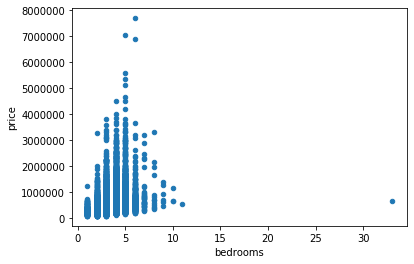

In [6]:
df.plot(kind='scatter',x='bedrooms',y='price')

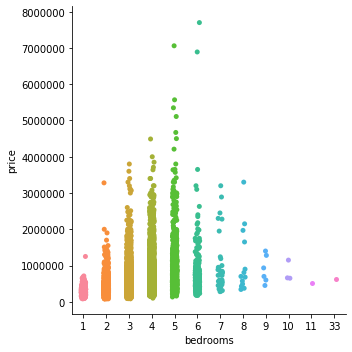

In [7]:
sns.catplot(data=df, x='bedrooms',y='price')

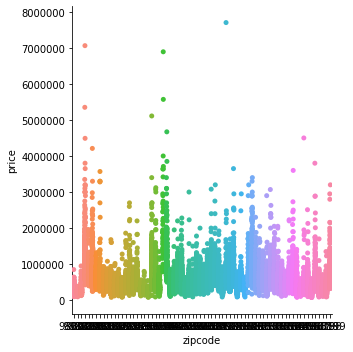

In [8]:
sns.catplot(data=df, x='zipcode',y='price')

In [10]:
zips = df['zipcode'].unique()

use_zips = zips[:5]

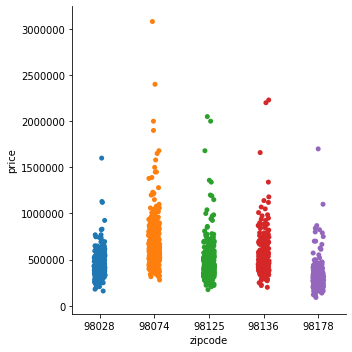

In [12]:
sns.catplot(data=df.loc[df['zipcode'].isin(use_zips)], x='zipcode',y='price')

In [18]:
df_zips = df.loc[df['zipcode'].isin(use_zips)].copy()
df_zips['zipcode'].nunique()

5

In [19]:
new_order = [98178, 98028, 98125,98136, 98074]
order_dict = dict(zip(new_order,range(len(new_order))))



In [20]:
df_zips['zip_enc']  = df_zips['zipcode'].map(order_dict)
df_zips

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zip_enc
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21571,6632300207,3/5/2015,385000.0,3,2.50,1520,1488,3.0,0.0,3,8,1520,0.0,2006,98125,47.7337,-122.309,1520,1497,2
21574,7430200100,5/14/2014,1220000.0,4,3.50,4910,9444,1.5,0.0,3,11,3110,1800.0,2007,98074,47.6502,-122.066,4560,11063,4
21575,4140940150,10/2/2014,572000.0,4,2.75,2770,3852,2.0,0.0,3,8,2770,0.0,2014,98178,47.5001,-122.232,1810,5641,0
21585,5100403806,4/7/2015,467000.0,3,2.50,1425,1179,3.0,0.0,3,8,1425,0.0,2008,98125,47.6963,-122.318,1285,1253,2


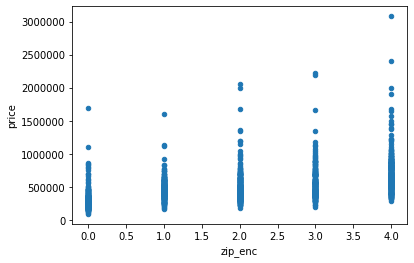

In [21]:
df_zips.plot(kind='scatter',x='zip_enc',y='price')